<a href="https://colab.research.google.com/github/yuxuan0702/Boston-Crime-/blob/master/IncidentsPattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns 
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster


plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# import dataset 
df = pd.read_csv('/content/drive/My Drive/Website_notebook/boston_crime.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"


In [4]:
# clean data 
df.drop(columns=['INCIDENT_NUMBER','SHOOTING'],inplace=True)
df = df[(df.YEAR!=2015) & (df.YEAR !=2020)]
df = df[df['DISTRICT']!='External']
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
df['OCCURRED_ON_DATE']=df['OCCURRED_ON_DATE'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398013 entries, 1 to 480712
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE         398013 non-null  int64  
 1   OFFENSE_CODE_GROUP   373242 non-null  object 
 2   OFFENSE_DESCRIPTION  398013 non-null  object 
 3   DISTRICT             395842 non-null  object 
 4   REPORTING_AREA       398013 non-null  object 
 5   OCCURRED_ON_DATE     398013 non-null  object 
 6   YEAR                 398013 non-null  int64  
 7   MONTH                398013 non-null  int64  
 8   DAY_OF_WEEK          398013 non-null  object 
 9   HOUR                 398013 non-null  int64  
 10  UCR_PART             373134 non-null  object 
 11  STREET               384433 non-null  object 
 12  Lat                  372484 non-null  float64
 13  Long                 372484 non-null  float64
 14  Location             398013 non-null  object 
dtypes: float64(2), in

In [0]:
# change district code to district name 
df['DISTRICT'].replace('D14','Brighton',inplace=True)
df['DISTRICT'].replace('C11','Dorchester',inplace=True)
df['DISTRICT'].replace('D4','SouthEnd',inplace=True)
df['DISTRICT'].replace('B3','Mattapan',inplace=True)
df['DISTRICT'].replace('B2','Roxbury',inplace=True)
df['DISTRICT'].replace('C6','SouthBoston',inplace=True)
df['DISTRICT'].replace('A1','Downtown',inplace=True)
df['DISTRICT'].replace('E5','WestRoxbury',inplace=True)
df['DISTRICT'].replace('A7','EastBoston',inplace=True)
df['DISTRICT'].replace('E13','JamaicaPlain',inplace=True)
df['DISTRICT'].replace('E18','HydePark',inplace=True)
df['DISTRICT'].replace('A15','Charlestown',inplace=True)

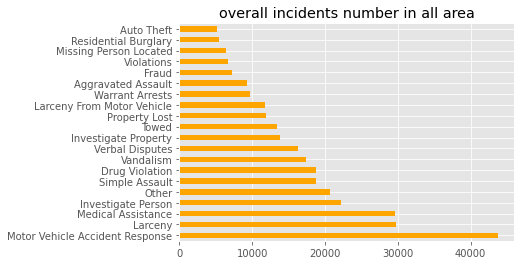

In [6]:
#overall incidents number in all area 
df['OFFENSE_CODE_GROUP'].value_counts().head(20).plot(kind='barh',color='orange')
plt.title('overall incidents number in all area')
plt.show()

In [7]:
# offense in time and district 
pivot_time = df.pivot_table(values = 'DAY_OF_WEEK',columns='DISTRICT',index=['OFFENSE_CODE_GROUP','OCCURRED_ON_DATE'],aggfunc='count',fill_value=0)
pivot_time

DISTRICT                             Brighton  ...  WestRoxbury
OFFENSE_CODE_GROUP OCCURRED_ON_DATE            ...             
Aggravated Assault 2016-01-01               0  ...            2
                   2016-01-02               0  ...            0
                   2016-01-03               0  ...            0
                   2016-01-05               0  ...            0
                   2016-01-06               0  ...            0
...                                       ...  ...          ...
Warrant Arrests    2019-09-29               0  ...            0
                   2016-01-04               0  ...            0
                   2016-12-29               0  ...            0
                   2018-03-21               1  ...            0
                   2018-11-26               0  ...            0

[51784 rows x 12 columns]

<Figure size 7200x6000 with 0 Axes>

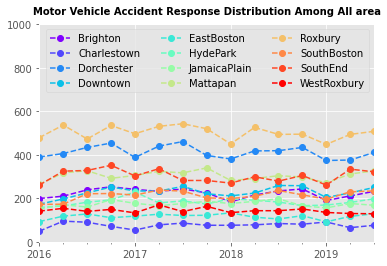

<Figure size 7200x6000 with 0 Axes>

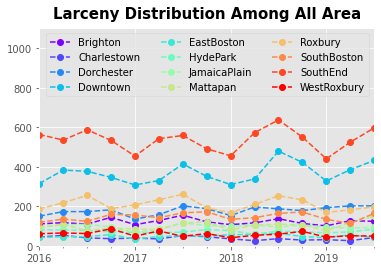

<Figure size 7200x6000 with 0 Axes>

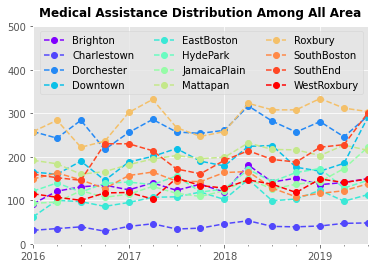

In [11]:
# Motor Vichhle 
MV = pivot_time.loc['Motor Vehicle Accident Response']
MV.index = pd.to_datetime(MV.index)
plt.figure(figsize=(12,10),dpi = 600)
MV.resample('Q').sum().plot(marker='o',linestyle='--',cmap = 'rainbow',linewidth=1.5)
plt.title('Motor Vehicle Accident Response Distribution Among All area',fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=10)
plt.ylim(0,1000)
plt.xlabel('')
plt.legend(ncol=3)
plt.show()

# Larceny Time 
Larceny = pivot_time.loc['Larceny']
Larceny.index = pd.to_datetime(Larceny.index)
plt.figure(figsize=(12,10),dpi = 600)
Larceny.resample('Q').sum().plot(marker='o',linestyle='--',cmap = 'rainbow',linewidth=1.5)
plt.title('Larceny Distribution Among All Area',fontdict={'fontsize':15,'fontweight':'bold'},loc='center',pad = 10)
plt.xlabel('')
plt.ylim(0,1100)
plt.legend(ncol=3)
plt.show()

# Medical Assistance 
MA = pivot_time.loc['Medical Assistance']
MA.index = pd.to_datetime(MA.index)
plt.figure(figsize=(12,10),dpi = 600)
MA.resample('Q').sum().plot(marker='o',linestyle='--',cmap = 'rainbow',linewidth=1.5)
plt.title('Medical Assistance Distribution Among All Area',fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad = 10)
plt.xlabel('')
plt.ylim(0,500)
plt.legend(ncol=3)
plt.show()

In [0]:
# Set Boston lat and long 
latitude = 42.3601
longitude = -71.0589

In [14]:
# personal injury location distribution 
personal_inj = df[df.OFFENSE_DESCRIPTION=='M/V ACCIDENT - PERSONAL INJURY'][['Lat','Long']].dropna()
some_map = folium.Map(location=[latitude,longitude], 
                      zoom_start=12)
mc = MarkerCluster()
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in personal_inj.itertuples():
    mc.add_child(folium.Marker(location=[row.Lat,row.Long]))
 
some_map.add_child(mc)
some_map